#### In this project OpenCV library to detect faces, eyes and smile in an image was used. 

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

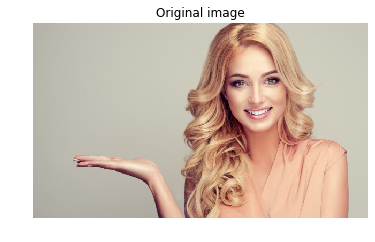

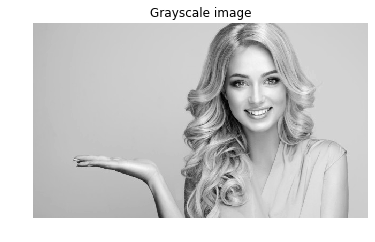

In [30]:
# Read the image

girl_img = cv2.imread('picture.jpg')
girl_img2 = cv2.cvtColor(girl_img, cv2.COLOR_BGR2RGB)
gray_img = cv2.cvtColor(girl_img, cv2.COLOR_BGR2GRAY)

plt.title("Original image")
plt.imshow(girl_img2)
plt.axis('off')
plt.show()

plt.title('Grayscale image')
plt.axis('off')
plt.imshow(gray_img, cmap='gray')
plt.show()


The function that converts the BGR image format to RBG to display the true colors of the image:

In [31]:
def convertColor(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

Loading files and create the Harr Cascade:

In [32]:
face_path = 'C:\\Users\\PC\\Anaconda3\\envs\\opencv\\Library\\etc\\haarcascades\\haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(face_path) 

eye_path = 'C:\\Users\\PC\\Anaconda3\\envs\\opencv\\Library\\etc\\haarcascades\\haarcascade_eye.xml'
eye_cascade = cv2.CascadeClassifier(eye_path)

smile_path = 'C:\\Users\\PC\\Anaconda3\\envs\\opencv\\Library\\etc\\haarcascades\\haarcascade_smile.xml'
smile_cascade = cv2.CascadeClassifier(smile_path)

We create a function which takes as an input image the grayscale one (gray) and original one (images) and then it will return the image with the detector rectangles.

In [33]:
def detection(gray, images):
    
    faces_detect = face_cascade.detectMultiScale(gray, 1.3, 5, minSize=(0, 0), flags = cv2.CASCADE_SCALE_IMAGE)

    # Draw a rectangle around the each faces, eye and smile
    for (x, y, w, h) in faces_detect:
        cv2.rectangle(images, (x, y), (x+w, y+h), (255, 0, 0), 2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = images[y:y+h, x:x+w]
        
        eyes = eye_cascade.detectMultiScale(roi_gray, 1.3, 2)
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)
        
        smile =  smile_cascade.detectMultiScale(roi_gray, 1.5, 22)
        for (sx, sy, sw, sh) in smile:
            cv2.rectangle(roi_color, (sx, sy), (sx + sw, sy + sh), (255, 0, 130), 2)
            cv2.putText(images, "Happy", (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    return images

We get the output of our detect function:

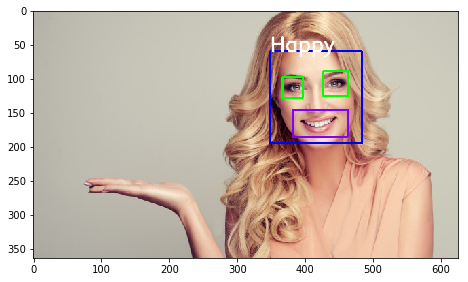

In [34]:
picture = detection(gray_img, girl_img)

plt.figure(figsize=(30, 10))
plt.subplot(211)
plt.imshow(girl_img2)

plt.imshow(convertColor(picture))

In this image we have successfully detected face, eyes and smile.